In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
print(tf.__version__)

2.17.0


In [2]:
import os

base_dir = "cats_and_dogs_filtered"
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [3]:
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cat_dir = os.path.join(train_dir, "cats")
train_dog_dir = os.path.join(train_dir, "dogs")

validation_cat_dir = os.path.join(validation_dir, "cats")
validation_dog_dir = os.path.join(validation_dir, "dogs")


In [4]:
train_cat_fnames = os.listdir( train_cat_dir)
train_dog_fnames = os.listdir( train_dog_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [5]:
print("Number of Training Cat Images:", len(train_cat_fnames))
print("Numebr of Training Dog Images:", len(train_dog_fnames))

print("Number of Validation Cat Images:", len( os.listdir( validation_cat_dir)))
print("Numebr of Validation Dog Images:", len( os.listdir( validation_dog_dir)))

Number of Training Cat Images: 1000
Numebr of Training Dog Images: 1000
Number of Validation Cat Images: 500
Numebr of Validation Dog Images: 500


In [6]:
image_size = ((150,150))
BATCH_SIZE = 20

In [7]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [8]:
train_datagen = image_dataset_from_directory(
    train_dir,
    batch_size=20,
    image_size=image_size
)

validation_datagen = image_dataset_from_directory(
    validation_dir,
    batch_size=20,
    image_size=image_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [9]:
class_names = train_datagen.class_names
print(class_names)

['cats', 'dogs']


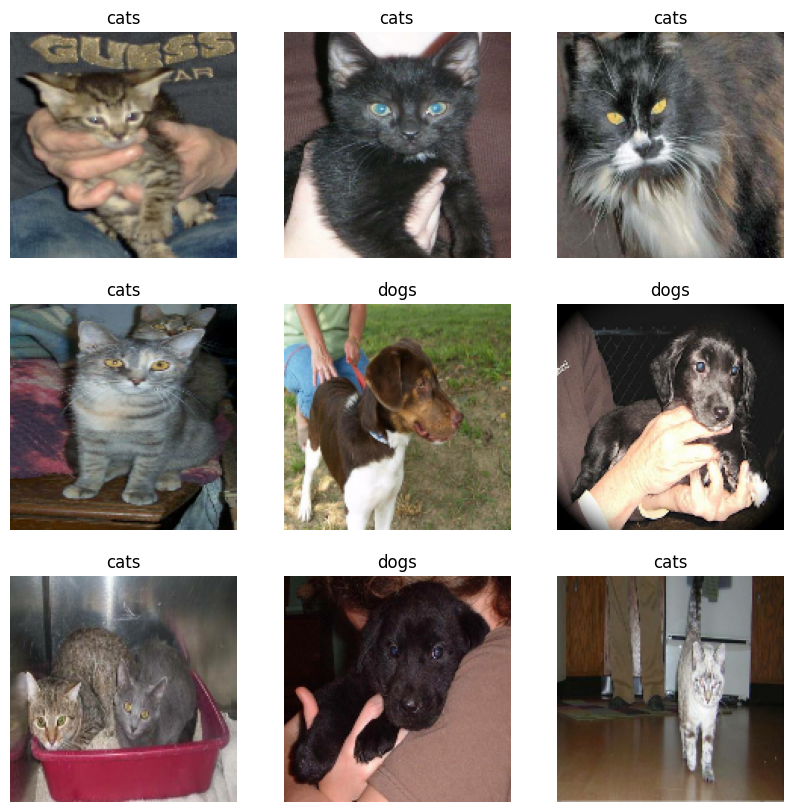

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_datagen.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_datagen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 150, 150, 3)
(20,)


In [12]:
rescale = keras.models.Sequential(
    [
        keras.layers.Rescaling(1./255)
    ]
)

In [13]:
model = keras.models.Sequential(
    [
        keras.layers.Rescaling(1./255),
        keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=((150,150,3))),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Conv2D(32, (3,3), activation="relu"),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Conv2D(64, (3,3), activation="relu"),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ]
)

c:\Users\Mohsin\.conda\envs\aml_project\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [18]:
history = model.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.8391 - loss: 0.3554 - val_accuracy: 0.7450 - val_loss: 0.5756
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 155ms/step - accuracy: 0.8889 - loss: 0.2723 - val_accuracy: 0.7150 - val_loss: 0.7108
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.9160 - loss: 0.2240 - val_accuracy: 0.7370 - val_loss: 0.7459
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 179ms/step - accuracy: 0.9398 - loss: 0.1455 - val_accuracy: 0.7400 - val_loss: 0.8543
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 191ms/step - accuracy: 0.9699 - loss: 0.0859 - val_accuracy: 0.7370 - val_loss: 0.9450
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.9760 - loss: 0.0592 - val_accuracy: 0.7380 - val_loss: 1.2027
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.9720 - loss: 0.2011 - val_accuracy: 0.7320 - val_loss: 1.2533
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - accuracy: 0.9796 - loss: 0

Text(0.5, 1.0, 'Training and validation loss')

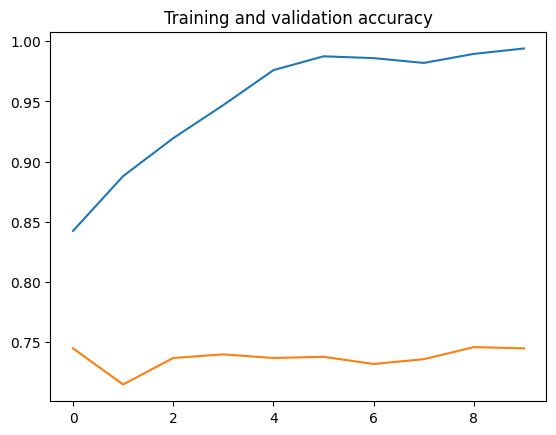

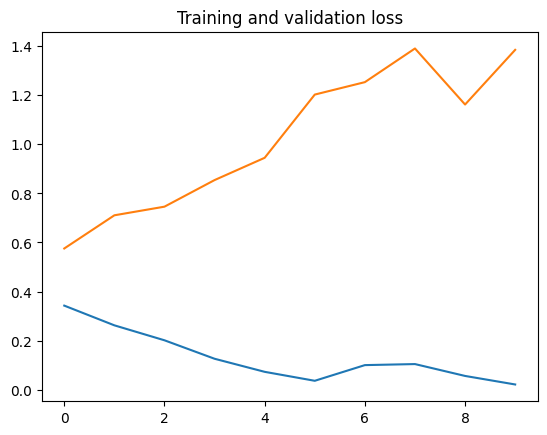

In [19]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss']
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs,acc )
plt.plot  (epochs,val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [118]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os

  # predicting images
path= "test_images/images.jpg"

img=load_img(path, target_size=(150, 150))

x=img_to_array(img)
x /= 255
print("Before expand_dims:",x.shape)
x=np.expand_dims(x, axis=0)
print("After expand_dims:",x.shape)
# images = np.vstack([x])

classes = model.predict(x, batch_size=10)

print(classes)

if classes[0]>0.5:
    print(" is a dog")
else:
    print(" is a cat")

Before expand_dims: (150, 150, 3)
After expand_dims: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[4.5503242e-07]]
 is a cat
